In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1:

(10 points)

**a)** The file `data_problem1.csv` contains a sequence of observations. In this problem you should do the following:

1. Load the data and split it into 80 % training and 20 % validation data.
2. Pre-process the data as you find appropriate.
3. Produce mean-squared-error curves for model orders in the range $p=1,\dots,10$. Plot both training and validation errors as two separate curves.
4. Based on the error curves, pick a final model order $p$ that you think is appropriate. **Motivate your choice!**


<div style="text-align: right"> (6p) </div>


In [3]:
data = pd.read_csv('data_problem1.csv', header = 0)
y = data['Data'].values

**Solution:**

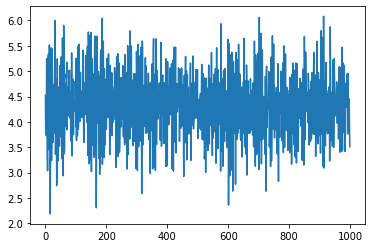

In [4]:
plt.plot(y)

**Motivation**: From the plot, data has non-zeor mean value which should be removed. And only the training data should be processed.

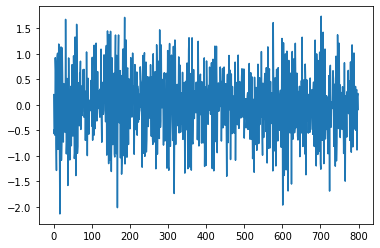

In [5]:
# pre-process and split data
n = int(len(y)*0.8)
mean_value = np.mean(y)
y = y - mean_value
train = y[0:n]
valid = y[n:]
plt.plot(train)

In [6]:
from tssltools import fit_ar, predict_ar_1step

[0.44680354557623886, 0.2859808655918733, 0.2751370878708663, 0.26633178615422015, 0.2598464699488788, 0.2597910977800376, 0.2600848139827715, 0.2593741979535631, 0.2595378107307306, 0.259655759628021]
[0.3531599274908135, 0.2603025549948637, 0.2520745219521336, 0.25402153394996274, 0.24033707051601502, 0.2401473824692001, 0.2404566217072155, 0.240044791551154, 0.23950192926428193, 0.24003266896343156]


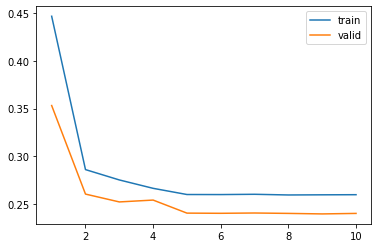

9


In [7]:
mse_train=[]
mse_valid=[]
for i in range(10):
    p = i+1
    theta = fit_ar(train,p)
    res = predict_ar_1step(theta,y)
    
    train_error = y[p:n] - res[:n-p]
    valid_error = y[n:] - res[n-p:]
    
    mse_train.append(np.mean((train_error)**2))
    mse_valid.append(np.mean((valid_error)**2))
    
print(mse_train)
print(mse_valid)
plt.plot([1,2,3,4,5,6,7,8,9,10],mse_train,label='train')
plt.plot([1,2,3,4,5,6,7,8,9,10],mse_valid,label='valid')
plt.legend()
plt.show()
print(np.argmin(mse_valid)+1)

Even p=9 has the best MSE, p =5 is still a better choice. Because they share similay MSE but we should welcome smaller p value. 

___

**b)** Verify that the resulting AR models is stable directly based on the model parameters.
<div style="text-align: right"> (2p) </div>

**Solution:**

In [8]:
optimal_theta = fit_ar(train,5)
#Lecture6 P7
matrix = np.eye(5,k=-1)
matrix[0,:] = optimal_theta

eigen = np.linalg.eig(matrix)
print(abs(sum(eigen[0]))

#all eigen value within unit circle matrix T

[0.89492995 0.89492995 0.62906636 0.55680038 0.55680038]


Since all absolute eigen value is smaller than 1, the model is stable.

___

**c)** Predict the value of $y_{n+1}$. Where $n$ is the **total number of observations** including both the training and testing data.
<div style="text-align: right"> (2p) </div>

**Solution:**

In [13]:
# get theta based on all the data
theta = fit_ar(y,5)
# calculate AR process and add mean value that we substract in the first step
res = theta@np.flip(valid[-5:])+mean_value
print(res)

print(theta)

4.496443694977623
[-0.14255113 -0.47463793 -0.08130014  0.17140874  0.17379859]
